In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from tqdm import tqdm

### Clean Data

In [22]:
df = pd.read_excel('VOC-ALS.xlsx')

In [23]:
print(df.shape) 
df.head()# note that first row is what should be the column names

(154, 89)


,Column-1,Column-2,Column-3,Column-4,Column-5,Column-6,Column-7,Column-8,Column-9,Column-10,...,Column-80,Column-81,Column-82,Column-83,Column-84,Column-85,Column-86,Column-87,Column-88,Column-89
0,ID,Age (years),Sex,Category,OnsetRegion,Therapy,GeneticTest,DiagnosticDelay,DiseaseDuration,FVC%,...,stdevF0Hz_reading,HNR_reading,localJitter_reading,localShimmer_reading,meanF0Hz_weekdays,stdevF0Hz_weekdays,HNR_weekdays,localJitter_weekdays,localShimmer_weekdays,Cantagallo_Questionnaire
1,CT001,56,F,HC,-,-,-,-,-,-,...,33.375746,13.675099,0.023379,0.11396,167.768436,15.147806,14.020984,0.017668,0.112806,7
2,CT004,72,F,HC,-,-,-,-,-,-,...,24.607553,20.211916,0.01303,0.068701,195.725146,25.969098,19.756,0.011523,0.059758,0
3,CT010,60,F,HC,-,-,-,-,-,-,...,22.178551,14.987857,0.018725,0.083444,129.716457,13.611625,15.968968,0.022525,0.084763,22
4,CT013,64,F,HC,-,-,-,-,-,-,...,40.830735,13.950918,0.023394,0.114586,196.566747,15.810296,14.328929,0.026948,0.122271,12


In [24]:
# set column names as first row
rename_map = dict([(old_name, new_name) for old_name, new_name in zip(df.axes[1], list(df.iloc[0]))])
renamed_df = df.rename(rename_map, axis=1)
renamed_df.head()

,ID,Age (years),Sex,Category,OnsetRegion,Therapy,GeneticTest,DiagnosticDelay,DiseaseDuration,FVC%,...,stdevF0Hz_reading,HNR_reading,localJitter_reading,localShimmer_reading,meanF0Hz_weekdays,stdevF0Hz_weekdays,HNR_weekdays,localJitter_weekdays,localShimmer_weekdays,Cantagallo_Questionnaire
0,ID,Age (years),Sex,Category,OnsetRegion,Therapy,GeneticTest,DiagnosticDelay,DiseaseDuration,FVC%,...,stdevF0Hz_reading,HNR_reading,localJitter_reading,localShimmer_reading,meanF0Hz_weekdays,stdevF0Hz_weekdays,HNR_weekdays,localJitter_weekdays,localShimmer_weekdays,Cantagallo_Questionnaire
1,CT001,56,F,HC,-,-,-,-,-,-,...,33.375746,13.675099,0.023379,0.11396,167.768436,15.147806,14.020984,0.017668,0.112806,7
2,CT004,72,F,HC,-,-,-,-,-,-,...,24.607553,20.211916,0.01303,0.068701,195.725146,25.969098,19.756,0.011523,0.059758,0
3,CT010,60,F,HC,-,-,-,-,-,-,...,22.178551,14.987857,0.018725,0.083444,129.716457,13.611625,15.968968,0.022525,0.084763,22
4,CT013,64,F,HC,-,-,-,-,-,-,...,40.830735,13.950918,0.023394,0.114586,196.566747,15.810296,14.328929,0.026948,0.122271,12


In [25]:
# remove diagnostic/treatments stuff as no values for healthy participants and first row (which held the column names)
clean_df = pd.concat([renamed_df.iloc[:,1:4], renamed_df.iloc[:,33:]], axis=1)[1:]
clean_df.head()

,Age (years),Sex,Category,meanF0Hz_A,stdevF0Hz_A,HNR_A,localJitter_A,localShimmer_A,meanF0Hz_E,stdevF0Hz_E,...,stdevF0Hz_reading,HNR_reading,localJitter_reading,localShimmer_reading,meanF0Hz_weekdays,stdevF0Hz_weekdays,HNR_weekdays,localJitter_weekdays,localShimmer_weekdays,Cantagallo_Questionnaire
1,56,F,HC,178.215501,1.780023,17.101148,0.003917,0.10771,188.704803,5.102617,...,33.375746,13.675099,0.023379,0.11396,167.768436,15.147806,14.020984,0.017668,0.112806,7
2,72,F,HC,184.581568,4.82997,23.711906,0.003241,0.037427,186.589774,6.743713,...,24.607553,20.211916,0.01303,0.068701,195.725146,25.969098,19.756,0.011523,0.059758,0
3,60,F,HC,138.06451,4.889886,13.408764,0.007635,0.045035,121.854496,9.231998,...,22.178551,14.987857,0.018725,0.083444,129.716457,13.611625,15.968968,0.022525,0.084763,22
4,64,F,HC,188.711443,25.447924,18.739481,0.005053,0.069086,170.371009,38.944956,...,40.830735,13.950918,0.023394,0.114586,196.566747,15.810296,14.328929,0.026948,0.122271,12
5,62,F,HC,183.862287,17.618466,22.189638,0.006957,0.041379,201.802895,3.364306,...,36.952328,14.039653,0.026335,0.103564,184.407533,30.29664,13.52561,0.028864,0.123836,3


In [26]:
# Convert category (ALS or HC) to binary so don't have to predict a string lol
binary_target = clean_df["Category"] == "ALS"
clean_df["Category"] = binary_target
clean_df.head()

,Age (years),Sex,Category,meanF0Hz_A,stdevF0Hz_A,HNR_A,localJitter_A,localShimmer_A,meanF0Hz_E,stdevF0Hz_E,...,stdevF0Hz_reading,HNR_reading,localJitter_reading,localShimmer_reading,meanF0Hz_weekdays,stdevF0Hz_weekdays,HNR_weekdays,localJitter_weekdays,localShimmer_weekdays,Cantagallo_Questionnaire
1,56,F,False,178.215501,1.780023,17.101148,0.003917,0.10771,188.704803,5.102617,...,33.375746,13.675099,0.023379,0.11396,167.768436,15.147806,14.020984,0.017668,0.112806,7
2,72,F,False,184.581568,4.82997,23.711906,0.003241,0.037427,186.589774,6.743713,...,24.607553,20.211916,0.01303,0.068701,195.725146,25.969098,19.756,0.011523,0.059758,0
3,60,F,False,138.06451,4.889886,13.408764,0.007635,0.045035,121.854496,9.231998,...,22.178551,14.987857,0.018725,0.083444,129.716457,13.611625,15.968968,0.022525,0.084763,22
4,64,F,False,188.711443,25.447924,18.739481,0.005053,0.069086,170.371009,38.944956,...,40.830735,13.950918,0.023394,0.114586,196.566747,15.810296,14.328929,0.026948,0.122271,12
5,62,F,False,183.862287,17.618466,22.189638,0.006957,0.041379,201.802895,3.364306,...,36.952328,14.039653,0.026335,0.103564,184.407533,30.29664,13.52561,0.028864,0.123836,3


In [27]:
# One-hot encode gender
is_male = clean_df["Sex"] == "M"
clean_df["gender_male"] = is_male.astype(int)
clean_df["gender_female"] = 1 - is_male
clean_df = clean_df.drop(columns="Sex")
clean_df.head()

,Age (years),Category,meanF0Hz_A,stdevF0Hz_A,HNR_A,localJitter_A,localShimmer_A,meanF0Hz_E,stdevF0Hz_E,HNR_E,...,localJitter_reading,localShimmer_reading,meanF0Hz_weekdays,stdevF0Hz_weekdays,HNR_weekdays,localJitter_weekdays,localShimmer_weekdays,Cantagallo_Questionnaire,gender_male,gender_female
1,56,False,178.215501,1.780023,17.101148,0.003917,0.10771,188.704803,5.102617,15.753448,...,0.023379,0.11396,167.768436,15.147806,14.020984,0.017668,0.112806,7,0,1
2,72,False,184.581568,4.82997,23.711906,0.003241,0.037427,186.589774,6.743713,24.135282,...,0.01303,0.068701,195.725146,25.969098,19.756,0.011523,0.059758,0,0,1
3,60,False,138.06451,4.889886,13.408764,0.007635,0.045035,121.854496,9.231998,7.932193,...,0.018725,0.083444,129.716457,13.611625,15.968968,0.022525,0.084763,22,0,1
4,64,False,188.711443,25.447924,18.739481,0.005053,0.069086,170.371009,38.944956,20.197039,...,0.023394,0.114586,196.566747,15.810296,14.328929,0.026948,0.122271,12,0,1
5,62,False,183.862287,17.618466,22.189638,0.006957,0.041379,201.802895,3.364306,20.652874,...,0.026335,0.103564,184.407533,30.29664,13.52561,0.028864,0.123836,3,0,1


In [28]:
# Make sure all columns are numeric so we can display them
for name in clean_df.columns:
    clean_df[name] = pd.to_numeric(clean_df[name], errors='coerce')

### EDA

In [29]:
clean_df.head()

,Age (years),Category,meanF0Hz_A,stdevF0Hz_A,HNR_A,localJitter_A,localShimmer_A,meanF0Hz_E,stdevF0Hz_E,HNR_E,...,localJitter_reading,localShimmer_reading,meanF0Hz_weekdays,stdevF0Hz_weekdays,HNR_weekdays,localJitter_weekdays,localShimmer_weekdays,Cantagallo_Questionnaire,gender_male,gender_female
1,56,False,178.215501,1.780023,17.101148,0.003917,0.107710,188.704803,5.102617,15.753448,...,0.023379,0.113960,167.768436,15.147806,14.020984,0.017668,0.112806,7,0,1
2,72,False,184.581568,4.829970,23.711906,0.003241,0.037427,186.589774,6.743713,24.135282,...,0.013030,0.068701,195.725146,25.969098,19.756000,0.011523,0.059758,0,0,1
3,60,False,138.064510,4.889886,13.408764,0.007635,0.045035,121.854496,9.231998,7.932193,...,0.018725,0.083444,129.716457,13.611625,15.968968,0.022525,0.084763,22,0,1
4,64,False,188.711443,25.447924,18.739481,0.005053,0.069086,170.371009,38.944956,20.197039,...,0.023394,0.114586,196.566747,15.810296,14.328929,0.026948,0.122271,12,0,1
5,62,False,183.862287,17.618466,22.189638,0.006957,0.041379,201.802895,3.364306,20.652874,...,0.026335,0.103564,184.407533,30.296640,13.525610,0.028864,0.123836,3,0,1


In [30]:
# what proportion of examples are positive
num_positive = sum(clean_df["Category"])
print(f"{num_positive} / {len(clean_df)} =  {num_positive / len(clean_df)}")

102 / 153 =  0.6666666666666666


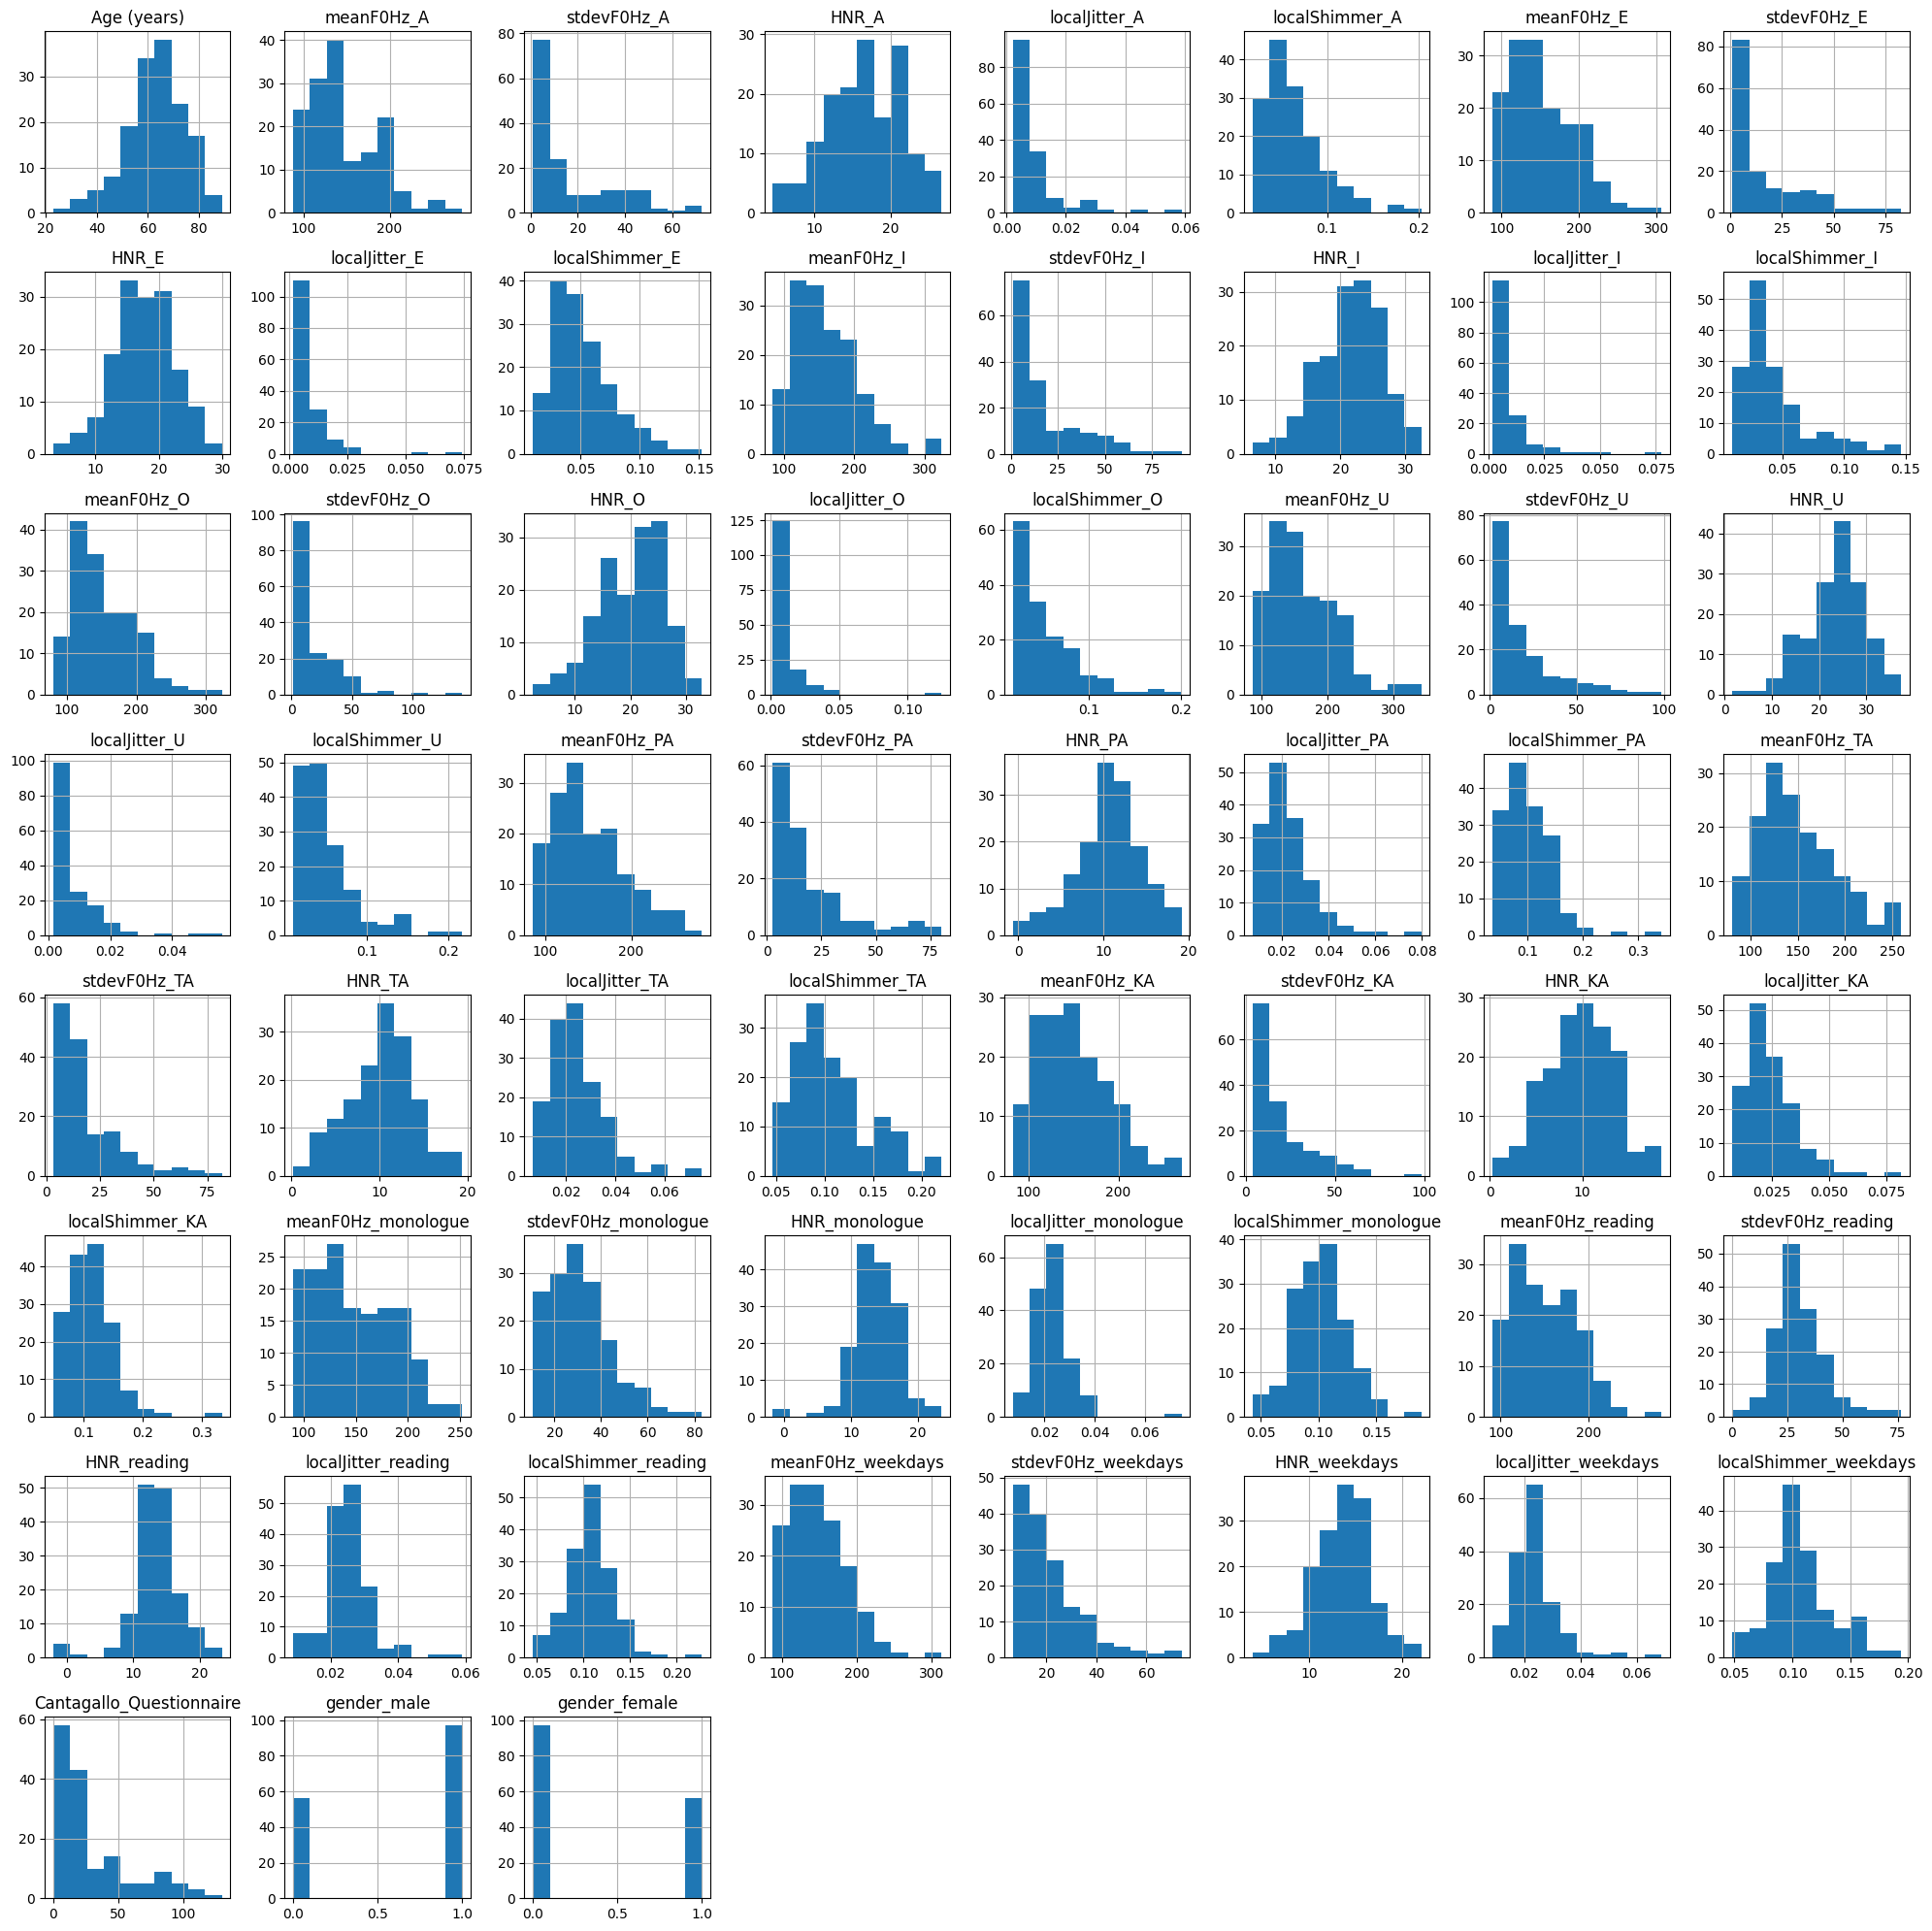

In [10]:
clean_df.hist(figsize=(20,20))
plt.tight_layout()

In [31]:
nan_counts_per_column = clean_df.isna().sum()
print(nan_counts_per_column)

Age (years)                 0
Category                    0
meanF0Hz_A                  0
stdevF0Hz_A                 0
HNR_A                       0
localJitter_A               0
localShimmer_A              0
meanF0Hz_E                  0
stdevF0Hz_E                 0
HNR_E                       0
localJitter_E               0
localShimmer_E              0
meanF0Hz_I                  0
stdevF0Hz_I                 0
HNR_I                       0
localJitter_I               0
localShimmer_I              0
meanF0Hz_O                  0
stdevF0Hz_O                 0
HNR_O                       0
localJitter_O               0
localShimmer_O              0
meanF0Hz_U                  0
stdevF0Hz_U                 0
HNR_U                       0
localJitter_U               0
localShimmer_U              0
meanF0Hz_PA                 0
stdevF0Hz_PA                0
HNR_PA                      0
localJitter_PA              0
localShimmer_PA             0
meanF0Hz_TA                 0
stdevF0Hz_

### Preprocessing

In [32]:
# get each column name so I don't have to type them all
for name in clean_df.columns:
    print(f"\"{name}\", ", end="")

"Age (years)", "Category", "meanF0Hz_A", "stdevF0Hz_A", "HNR_A", "localJitter_A", "localShimmer_A", "meanF0Hz_E", "stdevF0Hz_E", "HNR_E", "localJitter_E", "localShimmer_E", "meanF0Hz_I", "stdevF0Hz_I", "HNR_I", "localJitter_I", "localShimmer_I", "meanF0Hz_O", "stdevF0Hz_O", "HNR_O", "localJitter_O", "localShimmer_O", "meanF0Hz_U", "stdevF0Hz_U", "HNR_U", "localJitter_U", "localShimmer_U", "meanF0Hz_PA", "stdevF0Hz_PA", "HNR_PA", "localJitter_PA", "localShimmer_PA", "meanF0Hz_TA", "stdevF0Hz_TA", "HNR_TA", "localJitter_TA", "localShimmer_TA", "meanF0Hz_KA", "stdevF0Hz_KA", "HNR_KA", "localJitter_KA", "localShimmer_KA", "meanF0Hz_monologue", "stdevF0Hz_monologue", "HNR_monologue", "localJitter_monologue", "localShimmer_monologue", "meanF0Hz_reading", "stdevF0Hz_reading", "HNR_reading", "localJitter_reading", "localShimmer_reading", "meanF0Hz_weekdays", "stdevF0Hz_weekdays", "HNR_weekdays", "localJitter_weekdays", "localShimmer_weekdays", "Cantagallo_Questionnaire", "gender_male", "gender

(x - mu) / sd

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# numeric features that need standardizing
numeric_features = ["Age (years)", "meanF0Hz_A", "stdevF0Hz_A", "HNR_A", "localJitter_A", "localShimmer_A", "meanF0Hz_E", "stdevF0Hz_E", "HNR_E", "localJitter_E", "localShimmer_E", "meanF0Hz_I", "stdevF0Hz_I", "HNR_I", "localJitter_I", "localShimmer_I", "meanF0Hz_O", "stdevF0Hz_O", "HNR_O", "localJitter_O", "localShimmer_O", "meanF0Hz_U", "stdevF0Hz_U", "HNR_U", "localJitter_U", "localShimmer_U", "meanF0Hz_PA", "stdevF0Hz_PA", "HNR_PA", "localJitter_PA", "localShimmer_PA", "meanF0Hz_TA", "stdevF0Hz_TA", "HNR_TA", "localJitter_TA", "localShimmer_TA", "meanF0Hz_KA", "stdevF0Hz_KA", "HNR_KA", "localJitter_KA", "localShimmer_KA", "meanF0Hz_monologue", "stdevF0Hz_monologue", "HNR_monologue", "localJitter_monologue", "localShimmer_monologue", "meanF0Hz_reading", "stdevF0Hz_reading", "HNR_reading", "localJitter_reading", "localShimmer_reading", "meanF0Hz_weekdays", "stdevF0Hz_weekdays", "HNR_weekdays", "localJitter_weekdays", "localShimmer_weekdays", "Cantagallo_Questionnaire"]  # numerical columns
onehot_features = ["Category", 'gender_male', 'gender_female'] # no touchy

# Want to normalize numeric features (not ALS diagnosis, or one hot encoded gender)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', 'passthrough', onehot_features)  # leave these as-is
    ]
)

p = Pipeline(steps=[
    ('preprocessor', preprocessor)])

scaled_data = p.fit_transform(clean_df)

# Convert back to DataFrame
feature_names = p.get_feature_names_out()
all_feature_names = numeric_features + onehot_features
scaled_df = pd.DataFrame(scaled_data, columns=all_feature_names, index=clean_df.index)

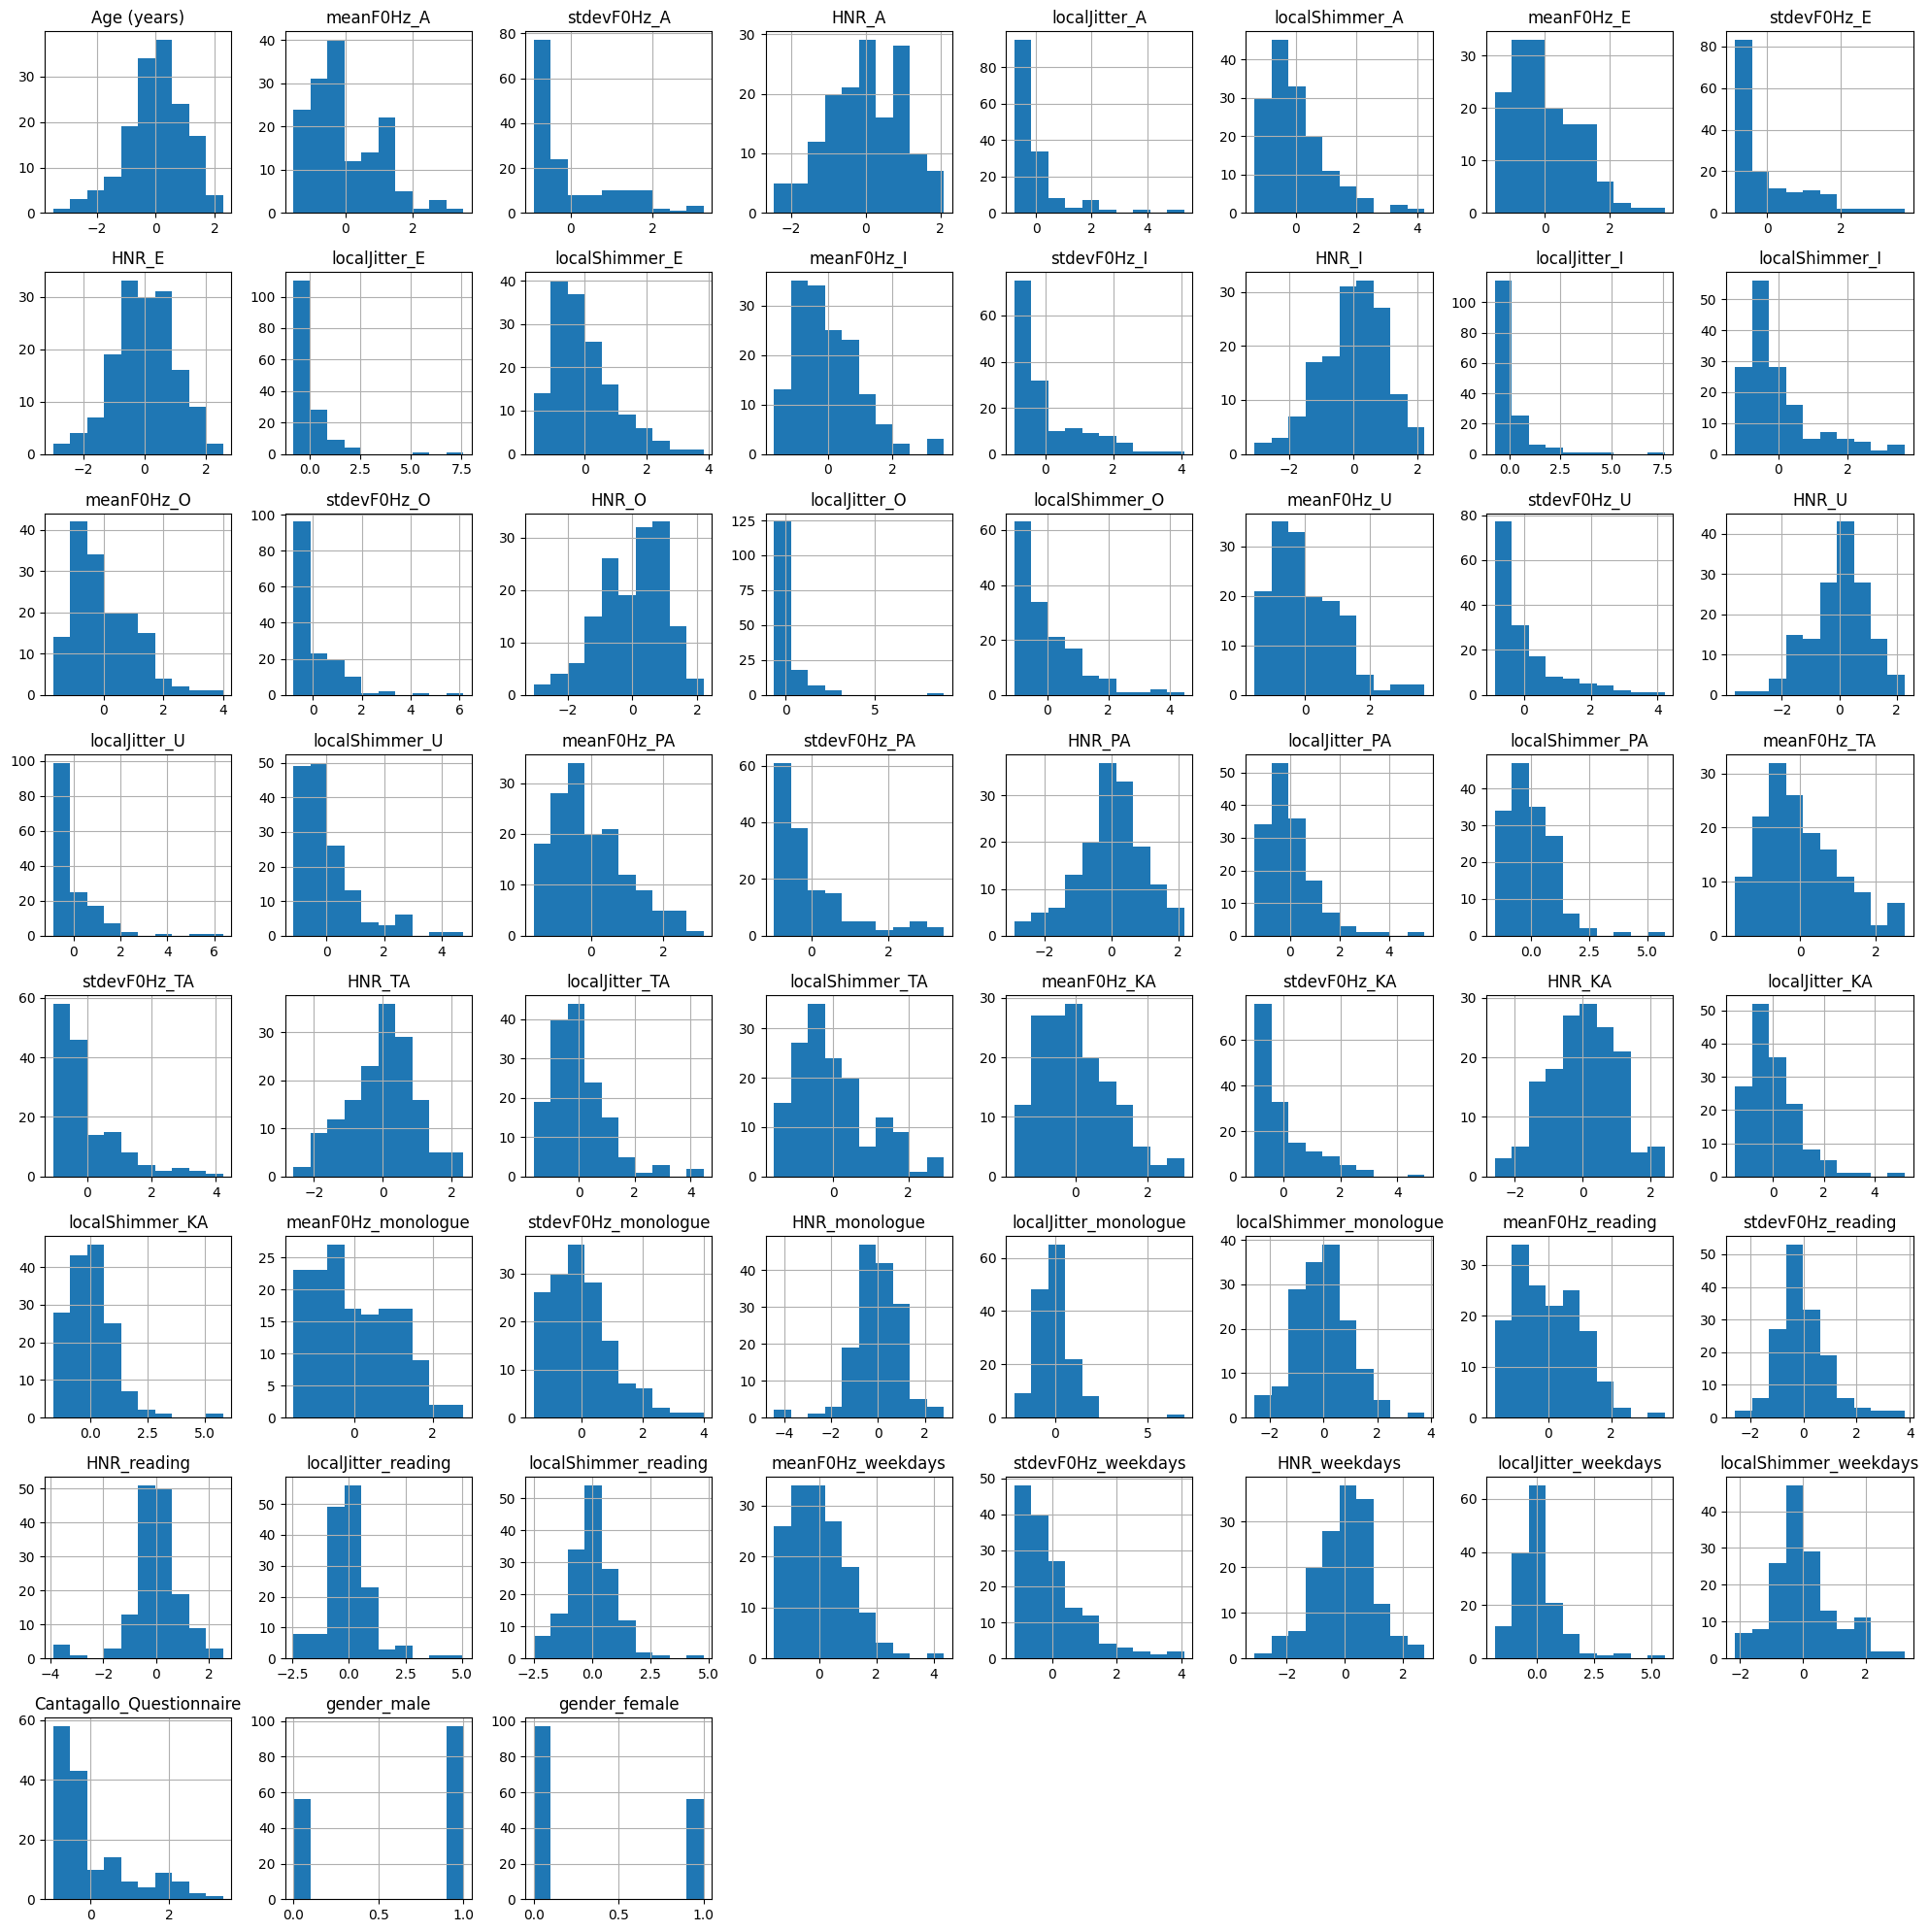

In [34]:
# do this thing again, not entirely sure why its needed dataframes are weird
for name in scaled_df.columns:
    scaled_df[name] = pd.to_numeric(scaled_df[name], errors='coerce')

scaled_df.hist(figsize=(20,20))
plt.tight_layout()

### Clean and Preprocess Function

In [2]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def prep_data(df):
    df = clean_data(df)
    df = preprocess_data(df)
    return df

def clean_data(df):
    
    # set column names as first row
    rename_map = dict([(old_name, new_name) for old_name, new_name in zip(df.axes[1], list(df.iloc[0]))])
    df = df.rename(rename_map, axis=1)

    # remove diagnostic/treatments stuff as no values for healthy participants and first row (which held the column names)
    df = pd.concat([df.iloc[:,1:4], df.iloc[:,33:]], axis=1)[1:]

    # Convert category (ALS or HC) to binary so don't have to predict a string lol
    binary_target = df["Category"] == "ALS"
    df["Category"] = binary_target

    # One-hot encode gender
    is_male = df["Sex"] == "M"
    df["gender_male"] = is_male.astype(int)
    df["gender_female"] = 1 - is_male
    df = df.drop(columns="Sex")

    return df

def preprocess_data(df):

    # numeric features that need standardizing
    numeric_features = ["Age (years)", "meanF0Hz_A", "stdevF0Hz_A", "HNR_A", "localJitter_A", "localShimmer_A", "meanF0Hz_E", "stdevF0Hz_E", "HNR_E", "localJitter_E", "localShimmer_E", "meanF0Hz_I", "stdevF0Hz_I", "HNR_I", "localJitter_I", "localShimmer_I", "meanF0Hz_O", "stdevF0Hz_O", "HNR_O", "localJitter_O", "localShimmer_O", "meanF0Hz_U", "stdevF0Hz_U", "HNR_U", "localJitter_U", "localShimmer_U", "meanF0Hz_PA", "stdevF0Hz_PA", "HNR_PA", "localJitter_PA", "localShimmer_PA", "meanF0Hz_TA", "stdevF0Hz_TA", "HNR_TA", "localJitter_TA", "localShimmer_TA", "meanF0Hz_KA", "stdevF0Hz_KA", "HNR_KA", "localJitter_KA", "localShimmer_KA", "meanF0Hz_monologue", "stdevF0Hz_monologue", "HNR_monologue", "localJitter_monologue", "localShimmer_monologue", "meanF0Hz_reading", "stdevF0Hz_reading", "HNR_reading", "localJitter_reading", "localShimmer_reading", "meanF0Hz_weekdays", "stdevF0Hz_weekdays", "HNR_weekdays", "localJitter_weekdays", "localShimmer_weekdays", "Cantagallo_Questionnaire"]  # numerical columns
    onehot_features = ["Category", 'gender_male', 'gender_female'] # no touchy

    # standardize numeric features (not ALS diagnosis, or one hot encoded gender)
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', 'passthrough', onehot_features)  # passthrough = no touchy
        ]
    )

    p = Pipeline(steps=[
        ('preprocessor', preprocessor)])

    scaled_data = p.fit_transform(df)

    # Convert back to DataFrame
    all_feature_names = numeric_features + onehot_features
    df = pd.DataFrame(scaled_data, columns=all_feature_names, index=df.index)

    # Make everything numeric
    for name in df.columns:
        df[name] = pd.to_numeric(df[name], errors='coerce')

    return df

df = prep_data(pd.read_excel('VOC-ALS.xlsx'))
df.head()

,Age (years),meanF0Hz_A,stdevF0Hz_A,HNR_A,localJitter_A,localShimmer_A,meanF0Hz_E,stdevF0Hz_E,HNR_E,localJitter_E,...,localShimmer_reading,meanF0Hz_weekdays,stdevF0Hz_weekdays,HNR_weekdays,localJitter_weekdays,localShimmer_weekdays,Cantagallo_Questionnaire,Category,gender_male,gender_female
1,-0.596545,0.780900,-0.854556,0.112354,-0.586274,1.340078,0.864894,-0.639528,-0.397213,-0.497281,...,0.251266,0.526677,-0.498159,0.134135,-0.752233,0.237306,-0.712214,False,0,1
2,0.799575,0.943590,-0.677661,1.474616,-0.658861,-0.793134,0.814170,-0.546830,1.355740,-0.601093,...,-1.561406,1.257791,0.343883,1.970252,-1.514839,-1.727805,-0.944415,False,0,1
3,-0.247515,-0.245186,-0.674186,-0.648526,-0.186461,-0.562193,-0.738366,-0.406278,-2.032928,1.909601,...,-0.970929,-0.468445,-0.617694,0.757799,-0.149436,-0.801535,-0.214640,False,0,1
4,0.101515,1.049131,0.518163,0.449962,-0.464083,0.167784,0.425198,1.272075,0.532107,-0.530237,...,0.276340,1.279800,-0.446608,0.232726,0.399517,0.587947,-0.546356,False,0,1
5,-0.073000,0.925208,0.064061,1.160927,-0.259407,-0.673165,1.179024,-0.737717,0.627439,-0.576983,...,-0.165096,0.961817,0.680624,-0.024464,0.637189,0.645913,-0.844900,False,0,1


### Genetic Algorithm

In [8]:
class GA:
    
    def __init__(self, fitness, data, target, max_generations, mutation_chance, population_size, n_features, elite_percent=0.4, elite_offset_per=0.0, rst_frac=1.0):
        self.fitness = fitness # fitness takes an encoding, data (X) and target (y) which are dataframes
        self.data = data # (train, test)
        self.target = target # (train, test)
        self.max_generations = max_generations
        self.mutation_chance = mutation_chance
        self.population_size = population_size
        self.n_features = n_features
        self.elite_num = int(round(elite_percent*population_size)) # top percent that are preserved between generations
        self.elite_offset = int(round(elite_offset_per*population_size))
        self.rst_frac = rst_frac

    def run(self):
        best_individual = None
        population = self.get_initial_population()

        # For plotting
        best_fitness_over_time = []
        avg_fitness_over_time = []
        worst_fitness_over_time= []

        for i in tqdm(range(self.max_generations)):

            # Random Sampling Technique
            sampled_indices = [ds.sample(frac=self.rst_frac).index for ds in self.data]

            self.cur_data = [self.data[0].loc[sampled_indices[0]], self.data[1].loc[sampled_indices[1]]]

            self.cur_target = [self.target[0].loc[sampled_indices[0]], self.target[1].loc[sampled_indices[1]]]

            weights = self.weighted_by(population)
            
            population = self.get_next_generation(population, weights)

            best_fitness_over_time.append(np.max(weights))
            worst_fitness_over_time.append(np.min(weights))
            avg_fitness_over_time.append(weights.mean())
        
        max_weight = np.max(weights)
        best_individual = population[np.argmax(weights)]
        return best_individual, max_weight, best_fitness_over_time, worst_fitness_over_time, avg_fitness_over_time

    # returns fitness of each individual in the population
    # NOTE weighting is not normalized (it is done implicitly by random.choices)
    def weighted_by(self, population):

        if self.fitness is None:
            weights = np.ones(self.population_size)
        else:
            weights = np.array([self.fitness(individual, self.cur_data, self.cur_target) for individual in population])

        return weights

    # flip random index
    def mutate(self, encoding):
        idx = np.random.randint(self.n_features)
        encoding[idx] = 1 - encoding[idx]

        return encoding

    # given a population and weights, gives the next generation
    # what generation/population model should we use?
    def get_next_generation(self, population, weights):
        next_population = None

        # replace entire population (for now)
        for i in range(self.population_size - self.elite_num):

            # random.choices returns list with one element which is the np array (the selected individual)
            # [0] to just get the np array
            parent1 = random.choices(population, weights)[0] # weighted probability (choices should do the normalization for us)
            parent2 = random.choices(population, weights)[0]
            child = self.reproduce(parent1, parent2)

            if np.random.random() < self.mutation_chance:
                child = self.mutate(child)
            
            if next_population is None:
                next_population = child.reshape((1, self.n_features))
            else:
                # child has to be 2d to append to 2d array (hence reshape)
                next_population = np.append(next_population, child.reshape((1, self.n_features)), axis=0)

        if self.elite_num > 0:
            elite_inds = np.argsort(-weights)
            # elite_individuals = population[elite_inds[self.elite_offset:self.elite_offset + self.elite_num]]
            elite_individuals = population[elite_inds[:self.elite_num]]
            next_population = np.concatenate([next_population, elite_individuals])

        return next_population

    # parents are 1d array w lengths = number of features
    def reproduce(self, parent1, parent2):
        idx = np.random.randint(self.n_features)
        child = np.concatenate((parent1[:idx], parent2[idx:]))

        # Uniform Crossover
        # child = np.where(mask, parent1, parent2)
        # mask = np.random.rand(self.n_features) < 0
        return child

    def get_initial_population(self):
        return np.random.randint(0, 2, (self.population_size, self.n_features))


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import fbeta_score

# data = (train, test)
# target = (train, test)
def fitness_function(encoding, data, target, alpha=0, n_features=59):
    mask = data[0].columns[encoding == 1] # include columns where encoding=1
    reg = LogisticRegression(random_state=0).fit(data[0][mask], target[0])
    preds = reg.predict(data[1][mask])
    penalty = alpha * sum(encoding) / n_features

    return fbeta_score(target[1], preds, beta=2) - penalty


### Testing

In [6]:
# Split data into training, testing, and validation sets with a 60/20/20 split
train_set, test_set = train_test_split(df, test_size=0.4, random_state=42)
test_set, val_set = train_test_split(test_set, test_size=0.5, random_state=42)

train_X = train_set.drop(columns="Category")
train_y = train_set["Category"]

test_X = test_set.drop(columns="Category")
test_y = test_set["Category"]

val_X = val_set.drop(columns="Category")
val_y = val_set["Category"]

print(train_X.shape)
print(test_X.shape)
print(val_X.shape)

(91, 59)
(31, 59)
(31, 59)


In [161]:
ga = GA(fitness_function,
        (train_X, test_X),
        (train_y, test_y),
        max_generations = 50,
        mutation_chance = 0.3,
        population_size = 50,
        n_features = train_X.shape[1],
        elite_percent=0.2,
        rst_frac=0.8)
encoding, weight, best_fitness_over_time, worst_fitness_over_time, avg_fitness_over_time = ga.run()


100%|██████████| 50/50 [00:37<00:00,  1.33it/s]


[1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0
 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0]
0.963855421686747


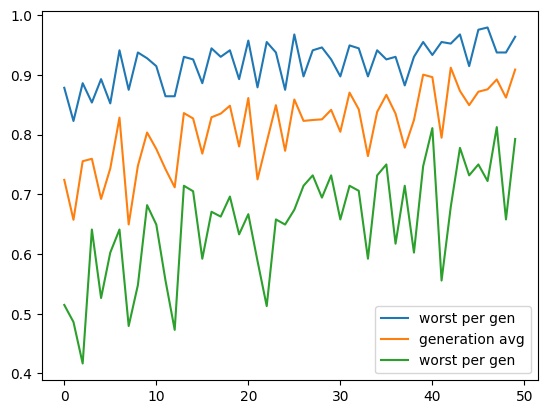

In [162]:
# Display GA results
print(encoding)
print(weight)

plt.plot(best_fitness_over_time, label="worst per gen")
plt.plot(avg_fitness_over_time, label="generation avg")
plt.plot(worst_fitness_over_time, label="worst per gen")
plt.legend()

In [163]:
# Test encoding on validation set
fitness_function(encoding, (train_X, val_X), (train_y, val_y))

0.8737864077669902

### Random Dummy

In [139]:
# test n random encodings and return the one with the best fitness
def random_dummy(ga, n):
    individuals = np.random.randint(0, 2, (n, ga.n_features))
    weights = np.array([fitness_function(individual, ga.data, ga.target) for individual in individuals])
    idx = np.argmax(weights)

    return individuals[idx], weights[idx]

total_individuals = ga.max_generations * ga.population_size
dummy_encoding, dummy_weight = random_dummy(ga, total_individuals)

In [19]:
print(dummy_encoding)
print(dummy_weight)

[0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0]
0.9174311926605505


In [20]:
# Test encoding on validation set
fitness_function(dummy_encoding, (train_X, val_X), (train_y, val_y))

0.8173076923076923

### Repeated Tests

In [14]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def test_individual(encoding, data, target):
    mask = data[0].columns[encoding == 1] # include columns where encoding=1
    reg = LogisticRegression().fit(data[0][mask], target[0])
    preds = reg.predict(data[1][mask])

    f2 = fbeta_score(target[1], preds, beta=2)
    precision = precision_score(target[1], preds)
    recall = recall_score(target[1], preds)

    return f2, precision, recall

In [144]:
n = 10
ga_weights = []
ga_num_features = []
ga_precisions = []
ga_recalls = []

random_weights = []
random_num_features = []
random_precisions = []
random_recalls = []

# GA
# ga = GA(fitness_function,
#         (train_X, test_X),
#         (train_y, test_y),
#         max_generations = 20,
#         mutation_chance = 0.3,
#         population_size = 50,
#         n_features = train_X.shape[1],
#         elite_percent=0.2)
# for i in range(n):
#     encoding, _, _, _ = ga.run()
    
#     # append score on validation set
#     weight, precision, recall = test_individual(encoding, (train_X, val_X), (train_y, val_y))
    
#     ga_weights.append(weight)
#     ga_precisions.append(precision)
#     ga_recalls.append(recall)
#     ga_num_features.append(np.sum(encoding))

# Random dummy
total_individuals = 50 * 50
for i in range(n):
    dummy_encoding, _ = random_dummy(ga, total_individuals) # uses ga.data and ga.target

    # append score on validation set
    weight, precision, recall = test_individual(dummy_encoding, (train_X, val_X), (train_y, val_y))
    
    random_weights.append(weight)
    random_precisions.append(precision)
    random_recalls.append(recall)
    random_num_features.append(np.sum(dummy_encoding))

In [145]:
print(random_weights)
print(random_num_features)

[0.8018867924528302, 0.8252427184466019, 0.7619047619047619, 0.970873786407767, 0.8252427184466019, 0.8252427184466019, 0.8173076923076923, 0.9047619047619048, 0.9433962264150944, 0.8333333333333334]
[26, 32, 29, 30, 19, 27, 30, 22, 23, 20]


GA Precision: nan
GA Recall: nan
GA average weight (F2): nan
GA Avg # Features: nan
Dummy precision: 0.7391094050876659
Dummy recall: 0.885
Dummy average weight (F2): 0.850919265292319
Dummy AVg # Features: 25.8


C:\Users\ari15\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ari15\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


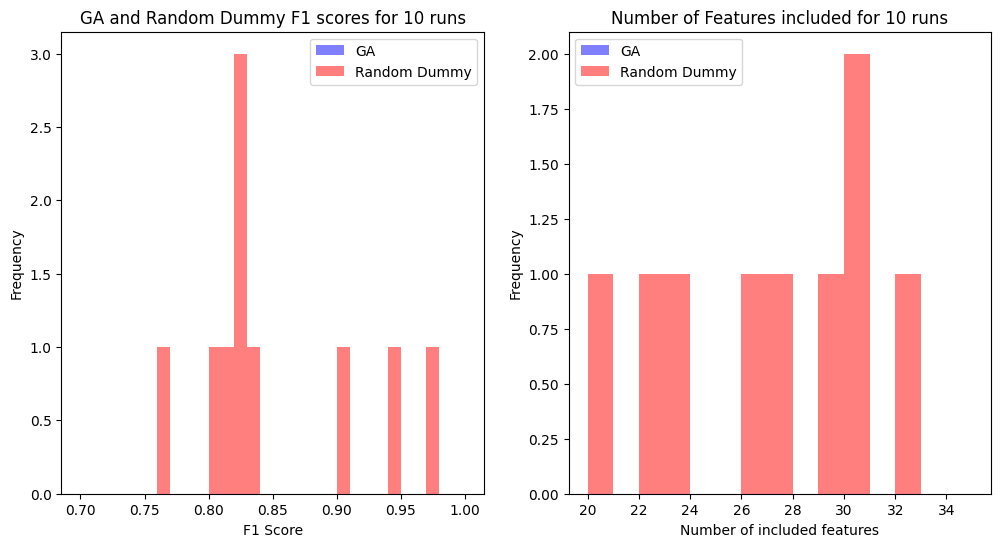

In [146]:
# Display results from n runs
print(f"GA Precision: {np.mean(ga_precisions)}")
print(f"GA Recall: {np.mean(ga_recalls)}")
print(f"GA average weight (F2): {np.mean(ga_weights)}")
print(f"GA Avg # Features: {np.mean(ga_num_features)}")

print(f"Dummy precision: {np.mean(random_precisions)}")
print(f"Dummy recall: {np.mean(random_recalls)}")
print(f"Dummy average weight (F2): {np.mean(random_weights)}")
print(f"Dummy AVg # Features: {np.mean(random_num_features)}")

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# F1 Score plot
axs[0].hist(ga_weights, color="blue", label="GA", alpha=0.5, bins=30, range=(0.7, 1.0))
axs[0].hist(random_weights, color="red", label="Random Dummy", alpha=0.5, bins=30, range=(0.7, 1.0))
axs[0].set_xlabel("F1 Score")
axs[0].set_ylabel("Frequency")
axs[0].set_title(f"GA and Random Dummy F1 scores for {n} runs")
axs[0].legend()

# Number of features plot
axs[1].hist(ga_num_features, color="blue", label="GA", alpha=0.5, bins=15, range=(20, 35))
axs[1].hist(random_num_features, color="red", label="Random Dummy", alpha=0.5, bins=15, range=(20, 35))
axs[1].set_xlabel("Number of included features")
axs[1].set_ylabel("Frequency")
axs[1].set_title(f"Number of Features included for {n} runs")
axs[1].legend()

GA Precision: 0.7497053453792584
GA Recall: 0.875
GA average weight (F2): 0.8462961424781685

### PCA then GA

In [39]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(train_X)
pca_train = pca.transform(train_X)
pca_test = pca.transform(test_X)
pca_val = pca.transform(val_X)

pca_train.shape

(91, 59)

100%|██████████| 50/50 [01:08<00:00,  1.37s/it]

On Unseen Set
f2 = 0.8823529411764706
precision = 0.8181818181818182
recall = 0.9
29
On Seen Test Set
f2 = 0.9523809523809523
precision = 0.8
recall = 1.0
29


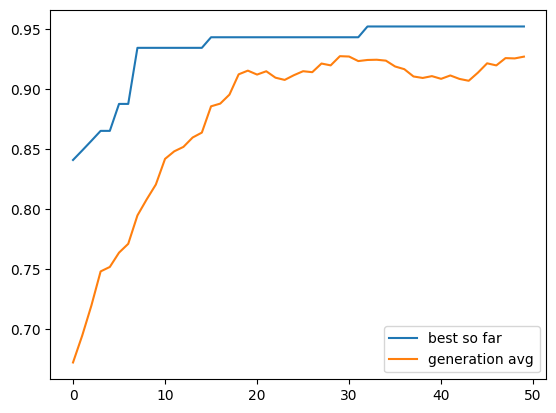

In [ ]:
ga = GA(fitness_function,
        (pd.DataFrame(pca_train), pd.DataFrame(pca_test)),
        (train_y, test_y),
        max_generations = 50,
        mutation_chance = 0.3,
        population_size = 100,
        n_features = train_X.shape[1],
        elite_percent=0.2)
encoding, weight, best_fitness_over_time, avg_fitness_over_time = ga.run()

print("On Unseen Set")
f2, precision, recall = test_individual(encoding, (pd.DataFrame(pca_train), pd.DataFrame(pca_val)), (train_y, val_y))
print(f"{f2 = }")
print(f"{precision = }")
print(f"{recall = }")
print(f"{np.sum(encoding)}")

print("On Seen Test Set") # (overfitting is obvious)
f2, precision, recall = test_individual(encoding, (pd.DataFrame(pca_train), pd.DataFrame(pca_test)), (train_y, test_y))
print(f"{f2 = }")
print(f"{precision = }")
print(f"{recall = }")
print(f"{np.sum(encoding)}")

plt.plot(best_fitness_over_time, label="best so far")
plt.plot(avg_fitness_over_time, label="generation avg")
plt.legend()

In [40]:
# double check overfitting issue on original dataset
ga = GA(fitness_function,
        (train_X, test_X),
        (train_y, test_y),
        max_generations = 20,
        mutation_chance = 0.3,
        population_size = 50,
        n_features = train_X.shape[1],
        elite_percent=0.2,
        rst_frac=0.8)
encoding, weight, best_fitness_over_time, avg_fitness_over_time = ga.run()

print("On Unseen Dataset:")
f2, precision, recall = test_individual(encoding, (train_X, val_X), (train_y, val_y))
print(f"{f2 = }")
print(f"{precision = }")
print(f"{recall = }")
print(f"{np.sum(encoding)}")

print("On Seen Train Set")
f2, precision, recall = test_individual(encoding, (train_X, test_X), (train_y, test_y))
print(f"{f2 = }")
print(f"{precision = }")
print(f"{recall = }")
print(f"{np.sum(encoding)}")

100%|██████████| 20/20 [00:14<00:00,  1.42it/s]

On Unseen Dataset:
f2 = 0.8252427184466019
precision = 0.7391304347826086
recall = 0.85
25
On Seen Train Set
f2 = 0.7766990291262136
precision = 0.6956521739130435
recall = 0.8
25


#### Repeated PCA then GA Tests

In [222]:
#### NEED TO CHANGE self.cur_data RST FROM loc TO iloc TO RUN
n = 10
ga_weights = []
ga_num_features = []
ga_precisions = []
ga_recalls = []
ga_run_weights = []

# GA
ga = GA(fitness_function,
        (pd.DataFrame(pca_train), pd.DataFrame(pca_test)),
        (train_y, test_y),
        max_generations = 20,
        mutation_chance = 0.3,
        population_size = 50,
        n_features = train_X.shape[1],
        elite_percent=0.2,
        rst_frac=0.8)
for i in range(n):
    encoding, run_weight, _, _, _ = ga.run()
    
    # append score on validation set
    weight, precision, recall = test_individual(encoding, (pd.DataFrame(pca_train), pd.DataFrame(pca_val)), (train_y, val_y))
    
    ga_run_weights.append(run_weight)
    ga_weights.append(weight)
    ga_precisions.append(precision)
    ga_recalls.append(recall)
    ga_num_features.append(np.sum(encoding))

100%|██████████| 20/20 [00:12<00:00,  1.55it/s]


In [223]:
print(f"PCS GA avg run weight (F2): {np.mean(ga_run_weights)}")
print(f"PCA GA Precision: {np.mean(ga_precisions)}")
print(f"PCA GA Recall: {np.mean(ga_recalls)}")
print(f"PCA GA average weight (F2): {np.mean(ga_weights)}")
print(f"PCA GA Avg # Features: {np.mean(ga_num_features)}")

PCS GA avg run weight (F2): 0.9136851025920631
PCA GA Precision: 0.7258029918607131
PCA GA Recall: 0.8649999999999999
PCA GA average weight (F2): 0.8317242925719801
PCA GA Avg # Features: 25.6


In [224]:
print(f"pca_{ga_run_weights = }")
print(f"pca_{ga_weights = }")
print(f"pca_{ga_num_features = }")

pca_ga_run_weights = [0.9195402298850575, 0.8522727272727273, 0.9375, 0.9444444444444444, 0.9302325581395349, 0.8928571428571429, 0.9375, 0.9042553191489362, 0.9036144578313253, 0.9146341463414634]
pca_ga_weights = [0.9047619047619048, 0.6862745098039216, 0.7766990291262136, 0.9223300970873787, 0.8962264150943396, 0.8173076923076923, 0.8, 0.8715596330275229, 0.7766990291262136, 0.8653846153846154]
pca_ga_num_features = [25, 29, 25, 24, 26, 24, 25, 23, 28, 27]


### Battle against Overfitting

In [71]:
# Baseline
n = 10
ga_weights = []
ga_num_features = []
ga_precisions = []
ga_recalls = []
ga_run_weights = []

ga = GA(fitness_function,
        (train_X, test_X),
        (train_y, test_y),
        max_generations = 50,
        mutation_chance = 0.3,
        population_size = 100,
        n_features = train_X.shape[1],
        elite_percent=0.2)
for i in range(n):
    encoding, run_weight, _, _ = ga.run()
    
    # append score on validation set
    weight, precision, recall = test_individual(encoding, (train_X, val_X), (train_y, val_y))
    
    ga_run_weights.append(run_weight)
    ga_weights.append(weight)
    ga_precisions.append(precision)
    ga_recalls.append(recall)
    ga_num_features.append(np.sum(encoding))

100%|██████████| 50/50 [01:18<00:00,  1.58s/it]


In [72]:
print(f"Baseline Results:")
print(f"GA average run weight (F2): {np.mean(ga_run_weights)}")
print(f"Precision: {np.mean(ga_precisions)}")
print(f"Recall: {np.mean(ga_recalls)}")
print(f"GA average weight (F2): {np.mean(ga_weights)}")
print(f"GA Avg # Features: {np.mean(ga_num_features)}")

Baseline Results:
GA average run weight (F2): 0.9121909404796021
Precision: 0.7583196457326892
Recall: 0.9349999999999999
GA average weight (F2): 0.892896053722833
GA Avg # Features: 20.6


In [73]:
print(f"{ga_run_weights = }")
print(f"{ga_weights = }")
print(f"{ga_num_features = }")

ga_run_weights = [0.9259259259259259, 0.9259259259259259, 0.9009009009009009, 0.8796296296296297, 0.9345794392523364, 0.8636363636363636, 0.8962264150943396, 0.9259259259259259, 0.9345794392523364, 0.9345794392523364]
ga_weights = [0.9134615384615384, 0.9433962264150944, 0.9047619047619048, 0.8737864077669902, 0.9047619047619048, 0.8737864077669902, 0.8878504672897196, 0.8737864077669902, 0.8571428571428571, 0.8962264150943396]
ga_num_features = [20, 24, 20, 21, 19, 19, 16, 29, 22, 16]


#### Test Alpha Again

In [ ]:
def alpha_fitness_function(encoding, data, target, alpha=0.001, n_features=59):
    mask = data[0].columns[encoding == 1] # include columns where encoding=1
    reg = LogisticRegression().fit(data[0][mask], target[0])
    preds = reg.predict(data[1][mask])
    penalty = alpha * sum(encoding) / n_features

    return fbeta_score(target[1], preds, beta=2) - penalty

In [ ]:
n = 10
ga_weights = []
ga_num_features = []
ga_precisions = []
ga_recalls = []

ga = GA(alpha_fitness_function,
        (train_X, test_X),
        (train_y, test_y),
        max_generations = 50,
        mutation_chance = 0.3,
        population_size = 100,
        n_features = train_X.shape[1],
        elite_percent=0.2)
for i in range(n):
    encoding, _, _, _ = ga.run()
    
    # append score on validation set
    weight, precision, recall = test_individual(encoding, (train_X, val_X), (train_y, val_y))
    
    ga_weights.append(weight)
    ga_precisions.append(precision)
    ga_recalls.append(recall)
    ga_num_features.append(np.sum(encoding))

100%|██████████| 50/50 [01:07<00:00,  1.35s/it]


In [85]:
print(f"GA Precision: {np.mean(ga_precisions)}")
print(f"GA Recall: {np.mean(ga_recalls)}")
print(f"GA average weight (F2): {np.mean(ga_weights)}")
print(f"GA Avg # Features: {np.mean(ga_num_features)}")

GA Precision: 0.7381387622039796
GA Recall: 0.865
GA average weight (F2): 0.8348226585433165
GA Avg # Features: 18.4


#### Cross Validation In Fitness Function (worse results)

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

f2_scorer = make_scorer(fbeta_score, beta=2)

def cv_fitness_function(encoding, data, target):
    mask = data[0].columns[encoding == 1] # include columns where encoding=1

    reg = LogisticRegression()
    scores = cross_val_score(reg, data[0][mask], target[0], cv=2, scoring=f2_scorer)

    return scores.mean()

In [53]:
# Don't need 3 sets for cv
cv_train_set, cv_test_set = train_test_split(df, test_size=0.2, random_state=42)

cv_train_X = train_set.drop(columns="Category")
cv_train_y = train_set["Category"]

cv_test_X = test_set.drop(columns="Category")
cv_test_y = test_set["Category"]

print(cv_train_X.shape)
print(cv_test_X.shape)

(91, 59)
(31, 59)


In [54]:
n = 1
ga_weights = []
ga_num_features = []
ga_precisions = []
ga_recalls = []

ga = GA(cv_fitness_function,
        (cv_train_X,),
        (cv_train_y,),
        max_generations = 50,
        mutation_chance = 0.3,
        population_size = 100,
        n_features = train_X.shape[1],
        elite_percent=0.2)
for i in range(n):
    encoding, _, _, _ = ga.run()
    
    # append score on validation set
    weight, precision, recall = test_individual(encoding, (cv_train_X, cv_test_X), (cv_train_y, cv_test_y))
    
    ga_weights.append(weight)
    ga_precisions.append(precision)
    ga_recalls.append(recall)
    ga_num_features.append(np.sum(encoding))

100%|██████████| 50/50 [02:41<00:00,  3.22s/it]


In [56]:
print(f"CV_GA Precision: {np.mean(ga_precisions)}")
print(f"CV_GA Recall: {np.mean(ga_recalls)}")
print(f"CV_GA average weight (F2): {np.mean(ga_weights)}")
print(f"CV_GA Avg # Features: {np.mean(ga_num_features)}")

CV_GA Precision: 0.6521739130434783
CV_GA Recall: 0.75
CV_GA average weight (F2): 0.7281553398058253
CV_GA Avg # Features: 21.0


#### Fewer Generations

In [ ]:
n = 10
ga_weights = []
ga_num_features = []
ga_precisions = []
ga_recalls = []

ga = GA(fitness_function,
        (train_X, test_X),
        (train_y, test_y),
        max_generations = 20,
        mutation_chance = 0.3,
        population_size = 100,
        n_features = train_X.shape[1],
        elite_percent=0.2)
for i in range(n):
    encoding, _, _, _ = ga.run()
    
    # append score on validation set
    weight, precision, recall = test_individual(encoding, (train_X, val_X), (train_y, val_y))
    
    ga_weights.append(weight)
    ga_precisions.append(precision)
    ga_recalls.append(recall)
    ga_num_features.append(np.sum(encoding))

100%|██████████| 20/20 [00:31<00:00,  1.55s/it]


In [109]:
print(f"Fewer Gen GA Precision: {np.mean(ga_precisions)}")
print(f"Fewer Gen GA Recall: {np.mean(ga_recalls)}")
print(f"Fewer Gen GA average weight (F2): {np.mean(ga_weights)}")
print(f"Fewer Gen GA Avg # Features: {np.mean(ga_num_features)}")

Fewer Gen GA Precision: 0.7169199801808498
Fewer Gen GA Recall: 0.8800000000000001
Fewer Gen GA average weight (F2): 0.8411050722228097
Fewer Gen GA Avg # Features: 26.2


#### No Elite (didn't help)

In [ ]:
n = 10
ga_weights = []
ga_num_features = []
ga_precisions = []
ga_recalls = []

ga = GA(fitness_function,
        (train_X, test_X),
        (train_y, test_y),
        max_generations = 20,
        mutation_chance = 0.3,
        population_size = 100,
        n_features = train_X.shape[1],
        elite_percent=0.0)
for i in range(n):
    encoding, _, _, _ = ga.run()
    
    # append score on validation set
    weight, precision, recall = test_individual(encoding, (train_X, val_X), (train_y, val_y))
    
    ga_weights.append(weight)
    ga_precisions.append(precision)
    ga_recalls.append(recall)
    ga_num_features.append(np.sum(encoding))

100%|██████████| 20/20 [00:29<00:00,  1.46s/it]


In [38]:
print(f"Fewer Gen GA Precision: {np.mean(ga_precisions)}")
print(f"Fewer Gen GA Recall: {np.mean(ga_recalls)}")
print(f"Fewer Gen GA average weight (F2): {np.mean(ga_weights)}")
print(f"Fewer Gen GA Avg # Features: {np.mean(ga_num_features)}")

Fewer Gen GA Precision: 0.7833978919631093
Fewer Gen GA Recall: 0.875
Fewer Gen GA average weight (F2): 0.854344712130447
Fewer Gen GA Avg # Features: 29.4


#### Elite Offset

In [ ]:
ga = GA(fitness_function,
        (train_X, test_X),
        (train_y, test_y),
        max_generations = 20,
        mutation_chance = 0.3,
        population_size = 100,
        n_features = train_X.shape[1],
        elite_percent=0.2,
        elite_offset_per=0.1)
encoding, weight, best_fitness_over_time, avg_fitness_over_time = ga.run()

100%|██████████| 20/20 [00:28<00:00,  1.44s/it]


0.9047619047619048
[0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0]


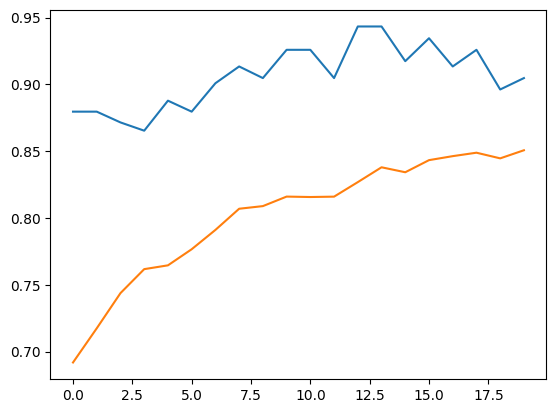

In [30]:
print(weight)
print(encoding)

plt.plot(best_fitness_over_time)
plt.plot(avg_fitness_over_time)

In [32]:
weight, precision, recall = test_individual(encoding, (train_X, val_X), (train_y, val_y))
print(f"{weight = }")
print(f"{precision = }")
print(f"{recall = }")

weight = 0.8252427184466019
precision = 0.7391304347826086
recall = 0.85


In [27]:
n = 10
ga_weights = []
ga_num_features = []
ga_precisions = []
ga_recalls = []

ga = GA(fitness_function,
        (train_X, test_X),
        (train_y, test_y),
        max_generations = 20,
        mutation_chance = 0.3,
        population_size = 50,
        n_features = train_X.shape[1],
        elite_percent=0.2,
        rst_frac=0.8,
        elite_offset_per=0.1)
for i in range(n):
    encoding, _, _, _ = ga.run()
    
    # append score on validation set
    weight, precision, recall = test_individual(encoding, (train_X, val_X), (train_y, val_y))
    
    ga_weights.append(weight)
    ga_precisions.append(precision)
    ga_recalls.append(recall)
    ga_num_features.append(np.sum(encoding))

100%|██████████| 20/20 [00:15<00:00,  1.31it/s]


In [28]:
print(f"Elite Offset GA Precision: {np.mean(ga_precisions)}")
print(f"Elite Offset GA Recall: {np.mean(ga_recalls)}")
print(f"Elite Offset GA average weight (F2): {np.mean(ga_weights)}")
print(f"Elite Offset GA Avg # Features: {np.mean(ga_num_features)}")

Elite Offset GA Precision: 0.7288553234205407
Elite Offset GA Recall: 0.885
Elite Offset GA average weight (F2): 0.8474138254135027
Elite Offset GA Avg # Features: 28.3


#### Smaller Population

In [45]:
n = 10
ga_weights = []
ga_num_features = []
ga_precisions = []
ga_recalls = []

ga = GA(fitness_function,
        (train_X, test_X),
        (train_y, test_y),
        max_generations = 20,
        mutation_chance = 0.3,
        population_size = 50,
        n_features = train_X.shape[1],
        elite_percent=0.2)
for i in range(n):
    encoding, _, _, _ = ga.run()
    
    # append score on validation set
    weight, precision, recall = test_individual(encoding, (train_X, val_X), (train_y, val_y))
    
    ga_weights.append(weight)
    ga_precisions.append(precision)
    ga_recalls.append(recall)
    ga_num_features.append(np.sum(encoding))

100%|██████████| 20/20 [00:14<00:00,  1.39it/s]


In [46]:
print(f"Smaller Pop GA Precision: {np.mean(ga_precisions)}")
print(f"Smaller Pop GA Recall: {np.mean(ga_recalls)}")
print(f"Smaller Pop GA average weight (F2): {np.mean(ga_weights)}")
print(f"Smaller Pop GA Avg # Features: {np.mean(ga_num_features)}")

Smaller Pop GA Precision: 0.743566587197022
Smaller Pop GA Recall: 0.8799999999999999
Smaller Pop GA average weight (F2): 0.8473075871931044
Smaller Pop GA Avg # Features: 28.0


#### Random Sampling Technique

In [26]:
n = 10
ga_weights = []
ga_num_features = []
ga_precisions = []
ga_recalls = []
ga_run_weights = []

ga = GA(fitness_function,
        (train_X, test_X),
        (train_y, test_y),
        max_generations = 20,
        mutation_chance = 0.3,
        population_size = 50,
        n_features = train_X.shape[1],
        elite_percent=0.2,
        rst_frac=.5)
for i in range(n):
    encoding, run_weight, _, _, _ = ga.run()
    
    # append score on validation set
    weight, precision, recall = test_individual(encoding, (train_X, val_X), (train_y, val_y))
    
    ga_run_weights.append(run_weight)
    ga_weights.append(weight)
    ga_precisions.append(precision)
    ga_recalls.append(recall)
    ga_num_features.append(np.sum(encoding))

100%|██████████| 20/20 [00:18<00:00,  1.09it/s]


In [27]:
print(f"RST Results:")
print(f"GA average run weight (F2): {np.mean(ga_run_weights)}")
print(f"Precision: {np.mean(ga_precisions)}")
print(f"Recall: {np.mean(ga_recalls)}")
print(f"GA average weight (F2): {np.mean(ga_weights)}")
print(f"GA Avg # Features: {np.mean(ga_num_features)}")

RST Results:
GA average run weight (F2): 0.8829388647404862
Precision: 0.7778659939094721
Recall: 0.885
GA average weight (F2): 0.859794602884139
GA Avg # Features: 28.0


In [166]:
print(f"{ga_run_weights = }")
print(f"{ga_weights = }")
print(f"{ga_num_features = }")

ga_run_weights = [0.9036144578313253, 0.8602150537634409, 0.9239130434782609, 0.7333333333333333, 0.8791208791208791, 0.9770114942528736, 0.8928571428571429, 0.851063829787234, 0.8333333333333334, 0.9036144578313253]
ga_weights = [0.8823529411764706, 0.8653846153846154, 0.8571428571428571, 0.7920792079207921, 0.9134615384615384, 0.8962264150943396, 0.9047619047619048, 0.9134615384615384, 0.8823529411764706, 0.9047619047619048]
ga_num_features = [25, 25, 18, 26, 23, 25, 25, 26, 28, 26]


RST 0.8 Results:
GA average run weight (F2): 0.8758077025589148
Precision: 0.7702370962370961
Recall: 0.9149999999999998
GA average weight (F2): 0.8811985864342432
GA Avg # Features: 24.7

### Demo

In [6]:
train_set, test_set = train_test_split(df, test_size=0.4, random_state=42)
test_set, val_set = train_test_split(test_set, test_size=0.5, random_state=42)

train_X = train_set.drop(columns="Category")
train_y = train_set["Category"]

test_X = test_set.drop(columns="Category")
test_y = test_set["Category"]

val_X = val_set.drop(columns="Category")
val_y = val_set["Category"]

print(train_X.shape)
print(test_X.shape)
print(val_X.shape)

(91, 59)
(31, 59)
(31, 59)


In [ ]:
ga = GA(fitness_function,
        (train_X, test_X),
        (train_y, test_y),
        max_generations = 50,
        mutation_chance = 0.3,
        population_size = 50,
        n_features = train_X.shape[1],
        elite_percent=0.2,
        rst_frac=.8)
encoding, weight, best_fitness_over_time, worst_fitness_over_time, avg_fitness_over_time = ga.run()

100%|██████████| 50/50 [00:52<00:00,  1.05s/it]


f2 on test set: weight = 0.9523809523809523
encoding = array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1])


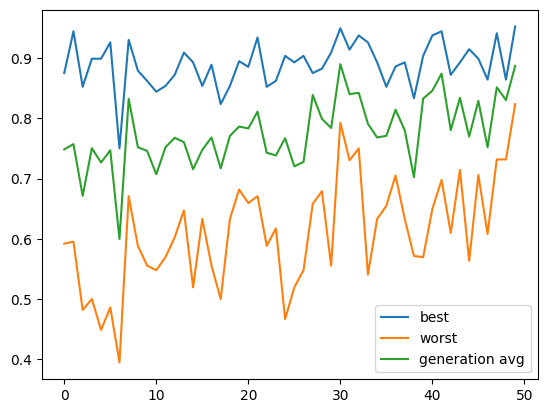

In [24]:
print(f"f2 on test set: {weight = }")
print(f"{encoding = }")

plt.plot(best_fitness_over_time, label="best")
plt.plot(worst_fitness_over_time, label="worst")
plt.plot(avg_fitness_over_time, label="generation avg")
plt.legend()

In [25]:
weight, precision, recall = test_individual(encoding, (train_X, val_X), (train_y, val_y))
print(f"f2: {weight = }")
print(f"{precision = }")
print(f"{recall = }")

f2: weight = 0.8737864077669902
precision = 0.782608695652174
recall = 0.9


In [22]:
# Compare to no feature selection
reg = LogisticRegression().fit(train_X, train_y)
preds = reg.predict(test_X)
print(fbeta_score(test_y, preds, beta=2))
print(precision_score(test_y, preds))
print(recall_score(test_y, preds))

0.6122448979591837
0.6666666666666666
0.6


### Classification Algs

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
reg = LogisticRegression().fit(train_X, train_y)
preds = reg.predict(test_X)
print(fbeta_score(test_y, preds, beta=2))

0.6122448979591837


In [ ]:
clf = LinearSVC(random_state=0).fit(train_X, train_y)
preds = clf.predict(test_X)
f1_score(test_y, preds)


0.6666666666666666

In [ ]:
train_X[[train_X.axes[1][0]]]

,Age (years)
95,65
69,50
23,46
46,67
77,69
...,...
72,78
107,51
15,61
93,53


In [ ]:
for i in range(train_X.shape[1]):
    reg = LogisticRegression().fit(train_X[[train_X.axes[1][i]]], train_y)
    preds = reg.predict(test_X[[train_X.axes[1][i]]])
    print(f"{i} {train_X.axes[1][i]}: {f1_score(preds, test_y)}")

0 Age (years): 0.7843137254901961
1 meanF0Hz_A: 0.7843137254901961
2 stdevF0Hz_A: 0.7843137254901961
3 HNR_A: 0.7843137254901961
4 localJitter_A: 0.7843137254901961
5 localShimmer_A: 0.7843137254901961
6 meanF0Hz_E: 0.7843137254901961
7 stdevF0Hz_E: 0.7843137254901961
8 HNR_E: 0.7843137254901961
9 localJitter_E: 0.7843137254901961
10 localShimmer_E: 0.7843137254901961
11 meanF0Hz_I: 0.7843137254901961
12 stdevF0Hz_I: 0.7843137254901961
13 HNR_I: 0.7843137254901961
14 localJitter_I: 0.7843137254901961
15 localShimmer_I: 0.7843137254901961
16 meanF0Hz_O: 0.7843137254901961
17 stdevF0Hz_O: 0.7843137254901961
18 HNR_O: 0.7843137254901961
19 localJitter_O: 0.7843137254901961
20 localShimmer_O: 0.7843137254901961
21 meanF0Hz_U: 0.7843137254901961
22 stdevF0Hz_U: 0.7843137254901961
23 HNR_U: 0.7843137254901961
24 localJitter_U: 0.7843137254901961
25 localShimmer_U: 0.7843137254901961
26 meanF0Hz_PA: 0.7843137254901961
27 stdevF0Hz_PA: 0.7755102040816326
28 HNR_PA: 0.7843137254901961
29 localJ